# **Task 5: Application of Quantum Machine Learning Model to Real-World Datasets**

### **Background**

#### **Title:Quantum Machine Learning for Conspicuity Detection in Production**

#### **Main Objectives:**
The project aims to leverage hybrid quantum computing to accelerate the process of detecting defective production parts. The primary focus is on implementing hybrid quantum algorithms and benchmarking them against classical approaches.

#### **Problem Statement:**
The project addresses the challenge of shifting from synthetic data (like sine functions) to real-world industrial datasets. The goal is to develop a Quantum Machine Learning model to detect defects in production parts. This involves data preprocessing, model implementation, and result visualization using a real-world dataset from Kaggle.

#### **Methodology:**
In this project, we will implement a quantum convolutional neural network (QCNN) using Pennylane to process and analyze the data. This notebook will detail all the steps, from data preprocessing to model implementation and result visualization.


# Download the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import shutil
import os

# Define the paths
source_train_dir = '/content/drive/MyDrive/train1'
source_test_dir = '/content/drive/MyDrive/test1'
destination_dir = '/content/Task5_QML'
destination_train_dir = os.path.join(destination_dir, 'train1')
destination_test_dir = os.path.join(destination_dir, 'test1')

# Create the destination directories
os.makedirs(destination_train_dir, exist_ok=True)
os.makedirs(destination_test_dir, exist_ok=True)

# Copy train files
if os.path.exists(source_train_dir):
    for filename in os.listdir(source_train_dir):
        src_file = os.path.join(source_train_dir, filename)
        dst_file = os.path.join(destination_train_dir, filename)
        if os.path.isfile(src_file):
            shutil.copy(src_file, dst_file)
        elif os.path.isdir(src_file):
            shutil.copytree(src_file, dst_file, dirs_exist_ok=True)

# Copy test files
if os.path.exists(source_test_dir):
    for filename in os.listdir(source_test_dir):
        src_file = os.path.join(source_test_dir, filename)
        dst_file = os.path.join(destination_test_dir, filename)
        if os.path.isfile(src_file):
            shutil.copy(src_file, dst_file)
        elif os.path.isdir(src_file):
            shutil.copytree(src_file, dst_file, dirs_exist_ok=True)

# Verify if the files were copied.
print("Files in Task5_QML/train1:")
print(os.listdir(destination_train_dir))

print("\nFiles in Task5_QML/test1:")
print(os.listdir(destination_test_dir))


Files in Task5_QML/train1:
['170904-113012-Al 2mm-part1', '170904-141232-Al 2mm-part2', '170904-113012-Al 2mm-part2', '170906-114912-Al 2mm', '170913-140725-Al 2mm', '170904-115959-Al 2mm', '170904-145718-Al 2mm-part1', '170913-143933-Al 2mm-part1', '170904-115503-Al 2mm', '170904-145718-Al 2mm-part2', '170815-133921-Al 2mm', '170815-134756-Al 2mm', '170906-144958-Al 2mm', '170906-141809-Al 2mm-part1', '170905-110711-Al 2mm-part1', '170906-153326-Al 2mm-part1', '170904-141232-Al 2mm-part3', '170904-141730-Al 2mm-part2', '170904-152301-Al 2mm-part1', '170906-153326-Al 2mm-part2', '170904-155523-Al 2mm', '170905-110711-Al 2mm-part2', '170904-141730-Al 2mm-part1', '170906-141809-Al 2mm-part2', '170913-152931-Al 2mm-part2', '170913-155806-Al 2mm-part2', '170904-154202-Al 2mm-part2', '170906-150010-Al 2mm', '170904-112347-Al 2mm', '170913-155806-Al 2mm-part1', '170904-151845-Al 2mm-part1', 'labels_data_train_sampled.json', '170904-141232-Al 2mm-part1', '170905-115602-Al 2mm', '170913-142501

# **Exploratory Data Analysis**

### **Deal with missing value(unlabeled images)**

In [4]:
import os
import json
import random

# Define paths to the image directories and labels JSON files
train_image_dir = '/content/Task5_QML/train1'
test_image_dir = '/content/Task5_QML/test1'
train_labels_path = '/content/Task5_QML/train1/labels_data_train.json'
test_labels_path = '/content/Task5_QML/test1/labels_data_test.json'

# number of labels
number_labels = list(range(6))

# Define a function to check for unlabeled images
def check_unlabeled_images(image_dir, labels_path):
    with open(labels_path) as f:
        labels_dict = json.load(f)

    image_filenames = set(os.listdir(image_dir))
    labeled_filenames = set(labels_dict.keys())

    unlabeled_images = image_filenames - labeled_filenames
    return unlabeled_images

# Define a function to assign random labels to unlabeled images and update the labels dictionary
def assign_random_labels(image_dir, labels_path, unlabeled_images):
    with open(labels_path, 'r+') as f:
        labels_dict = json.load(f)

        for img in unlabeled_images:
            random_label = random.choice(number_labels)
            labels_dict[img] = random_label
            print(f"Assigned random label '{random_label}' to {img}")

        # Move the file pointer to the beginning and truncate the file to overwrite it
        f.seek(0)
        json.dump(labels_dict, f, indent=4)
        f.truncate()

# Check for unlabeled images in train and test datasets
unlabeled_train_images = check_unlabeled_images(train_image_dir, train_labels_path)
unlabeled_test_images = check_unlabeled_images(test_image_dir, test_labels_path)

print(f"Unlabeled training images: {unlabeled_train_images}")
print(f"Unlabeled test images: {unlabeled_test_images}")

# Assign random labels to the unlabeled images
assign_random_labels(train_image_dir, train_labels_path, unlabeled_train_images)
assign_random_labels(test_image_dir, test_labels_path, unlabeled_test_images)

# Verify if all images are labeled now
unlabeled_train_images_after_assignment = check_unlabeled_images(train_image_dir, train_labels_path)
unlabeled_test_images_after_assignment = check_unlabeled_images(test_image_dir, test_labels_path)

print(f"Unlabeled training images after random label assignment: {unlabeled_train_images_after_assignment}")
print(f"Unlabeled test images after random label assignment: {unlabeled_test_images_after_assignment}")


Unlabeled training images: {'170906-144958-Al 2mm', '170906-141809-Al 2mm-part1', '170904-145718-Al 2mm-part1', '170815-134756-Al 2mm', '170913-143933-Al 2mm-part1', '170906-153326-Al 2mm-part1', '170906-150801-Al 2mm', '170906-114912-Al 2mm', '170905-115602-Al 2mm', '170913-152931-Al 2mm-part2', '170913-143933-Al 2mm-part2', '170913-140725-Al 2mm', '170904-145718-Al 2mm-part2', '170905-114307-Al 2mm', '170904-151845-Al 2mm-part1', '170904-113012-Al 2mm-part2', '170815-133921-Al 2mm', '170904-113012-Al 2mm-part1', '170904-141730-Al 2mm-part1', '170904-115959-Al 2mm', '170906-153326-Al 2mm-part2', '170904-155523-Al 2mm', '170913-155806-Al 2mm-part2', '170904-154202-Al 2mm-part2', '170913-142501-Al 2mm', '170905-110711-Al 2mm-part1', '170906-113317-Al 2mm-part3', 'labels_data_train.json', '170905-110711-Al 2mm-part2', '170904-115503-Al 2mm', '170904-112347-Al 2mm', '170904-141730-Al 2mm-part3', '170913-151508-Al 2mm-part1', '170913-151508-Al 2mm-part2', '170906-141809-Al 2mm-part2', '170

### **checking the distribution of the orignal dataset**

In [5]:
import json
import os
from collections import defaultdict

# Define paths to the labels JSON files
train_labels_path = '/content/Task5_QML/train1/labels_data_train.json'
test_labels_path = '/content/Task5_QML/test1/labels_data_test.json'


# Load the labels from JSON files
with open(train_labels_path) as f:
    train_labels = json.load(f)

with open(test_labels_path) as f:
    test_labels = json.load(f)

# Define a function to count images per class
def count_images_per_class(labels_dict):
    class_counts = defaultdict(int)
    for label in labels_dict.values():
        class_counts[label] += 1
    return class_counts

# Count images per class in train and test datasets
train_class_counts = count_images_per_class(train_labels)
test_class_counts = count_images_per_class(test_labels)

# Calculate total images in the train and test datasets
total_train_images = sum(train_class_counts.values())
total_test_images = sum(test_class_counts.values())

# Print the results
label_names = ["good weld", "burn through", "contamination", "lack of fusion", "misalignment", "lack of penetration"]

print("Train dataset class counts:")
for label, name in enumerate(label_names):
    print(f"{name}: {train_class_counts[label]} images")
print(f"Total train images: {total_train_images}")

print("\nTest dataset class counts:")
for label, name in enumerate(label_names):
    print(f"{name}: {test_class_counts[label]} images")
print(f"Total test images: {total_test_images}")


Train dataset class counts:
good weld: 8768 images
burn through: 1793 images
contamination: 6333 images
lack of fusion: 4032 images
misalignment: 2962 images
lack of penetration: 2826 images
Total train images: 26714

Test dataset class counts:
good weld: 2189 images
burn through: 355 images
contamination: 2082 images
lack of fusion: 1011 images
misalignment: 732 images
lack of penetration: 235 images
Total test images: 6604


Train dataset class distribution:
good weld: 32.82%
burn through: 6.71%
contamination: 23.71%
lack of fusion: 15.09%
misalignment: 11.09%
lack of penetration: 10.58%
Total train images: 26714

Test dataset class distribution:
good weld: 33.15%
burn through: 5.38%
contamination: 31.53%
lack of fusion: 15.31%
misalignment: 11.08%
lack of penetration: 3.56%
Total test images: 6604


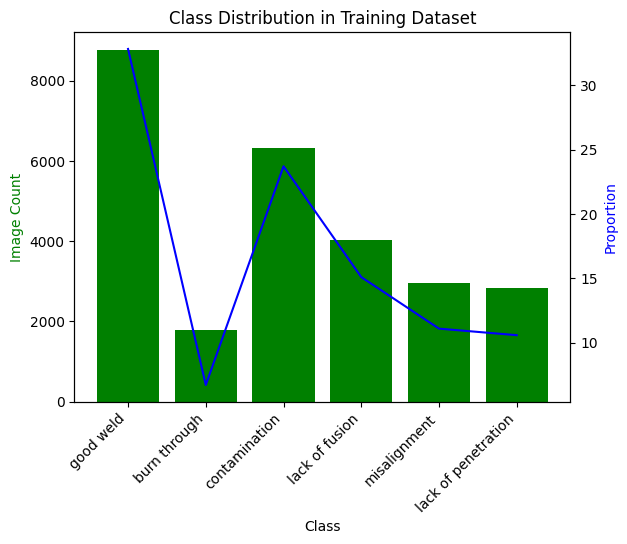

In [6]:
import matplotlib.pyplot as plt

# Calculate the percentage distribution
label_names = ["good weld", "burn through", "contamination", "lack of fusion", "misalignment", "lack of penetration"]

train_percentages = [(train_class_counts[i] / total_train_images) * 100 for i in range(len(label_names))]
test_percentages = [(test_class_counts[i] / total_test_images) * 100 for i in range(len(label_names))]

# Print the percentage distribution
print("Train dataset class distribution:")
for label, name in enumerate(label_names):
    count = train_class_counts[label]
    percentage = (count / total_train_images) * 100
    print(f"{name}: {percentage:.2f}%")
print(f"Total train images: {total_train_images}")

print("\nTest dataset class distribution:")
for label, name in enumerate(label_names):
    count = test_class_counts[label]
    percentage = (count / total_test_images) * 100
    print(f"{name}: {percentage:.2f}%")
print(f"Total test images: {total_test_images}")

# Plot the class distribution for the training dataset
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(label_names, [train_class_counts[i] for i in range(len(label_names))], color='g')
ax2.plot(label_names, train_percentages, color='b')

ax1.set_xlabel('Class')
ax1.set_ylabel('Image Count', color='g')
ax2.set_ylabel('Proportion', color='b')
ax1.set_title('Class Distribution in Training Dataset')

# Set the ticks and labels for x-axis
ax1.set_xticks(range(len(label_names)))
ax1.set_xticklabels(label_names, rotation=45, ha='right', fontsize=10)

plt.show()



As illustrated in the graph above, the dataset contains unbalanced classes. However, considering the specific objectives of our model, addressing class imbalance is not necessary. Instead, for the quantum model, we will select an equal number of samples from each class to create a balanced dataset, using only a subset of the entire dataset.

In Google Colab, we will work with a certain percentage of the dataset. From this subset, we will choose a reasonable number of images to train and validate the model, ensuring that the quantum model has balanced class representation.

### **Visualization of the porcentage of data we submit in Google Colab**

In [7]:
import json
import os
from collections import defaultdict

# Define paths to the labels JSON files
train_labels_path = '/content/Task5_QML/train1/labels_data_train_sampled.json'
test_labels_path = '/content/Task5_QML/test1/labels_data_test_sampled.json'


# Load the labels from JSON files
with open(train_labels_path) as f:
    train_labels = json.load(f)

with open(test_labels_path) as f:
    test_labels = json.load(f)

# Define a Function to count images per class
def count_images_per_class(labels_dict):
    class_counts = defaultdict(int)
    for label in labels_dict.values():
        class_counts[label] += 1
    return class_counts

# Count images per class in train and test datasets
train_class_counts = count_images_per_class(train_labels)
test_class_counts = count_images_per_class(test_labels)

# Calculate total images in the train and test datasets
total_train_images = sum(train_class_counts.values())
total_test_images = sum(test_class_counts.values())

# Print the results
label_names = ["good weld", "burn through", "contamination", "lack of fusion", "misalignment", "lack of penetration"]

print("Train dataset class counts:")
for label, name in enumerate(label_names):
    print(f"{name}: {train_class_counts[label]} images")
print(f"Total train images: {total_train_images}")

print("\nTest dataset class counts:")
for label, name in enumerate(label_names):
    print(f"{name}: {test_class_counts[label]} images")
print(f"Total test images: {total_test_images}")

Train dataset class counts:
good weld: 2630 images
burn through: 537 images
contamination: 1898 images
lack of fusion: 1211 images
misalignment: 888 images
lack of penetration: 847 images
Total train images: 8011

Test dataset class counts:
good weld: 1094 images
burn through: 177 images
contamination: 1041 images
lack of fusion: 505 images
misalignment: 366 images
lack of penetration: 117 images
Total test images: 3300


<ipython-input-8-87bbe96519c9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(label_names, rotation=45, ha="right")
<ipython-input-8-87bbe96519c9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(label_names, rotation=45, ha="right")


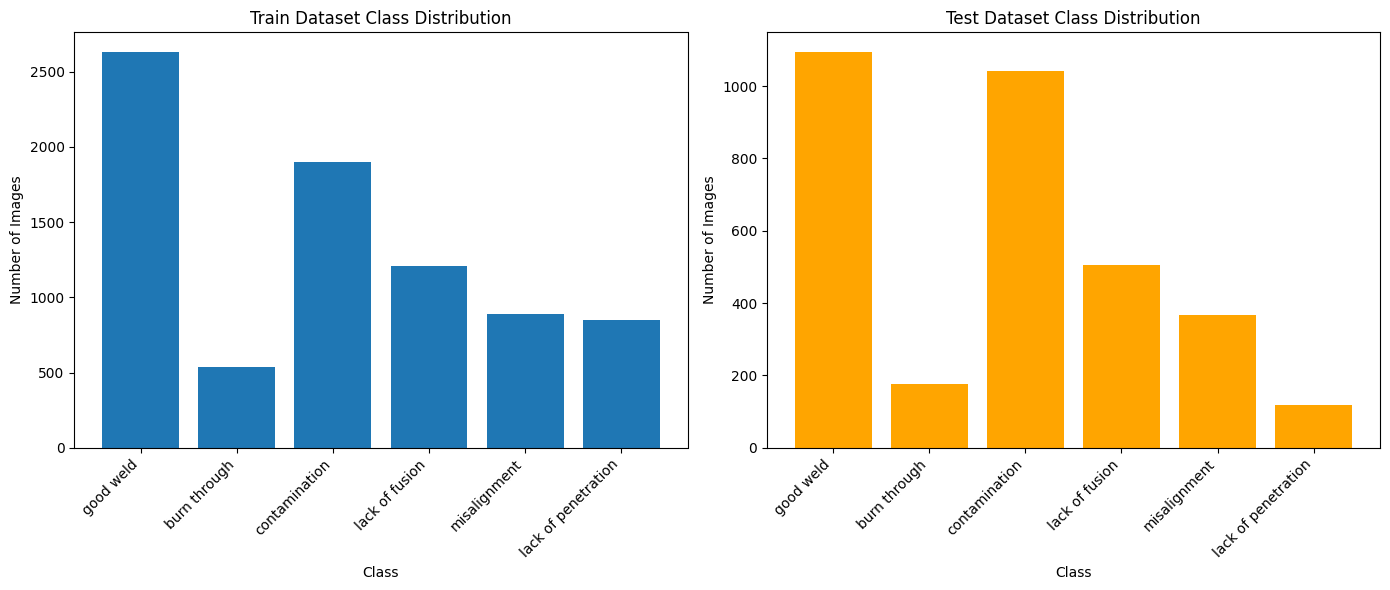

In [8]:
import matplotlib.pyplot as plt

# Plot class distributions for train and test datasets
def plot_class_distribution(train_counts, test_counts, label_names):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].bar(label_names, train_counts)
    axes[0].set_title("Train Dataset Class Distribution")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Number of Images")
    axes[0].set_xticklabels(label_names, rotation=45, ha="right")

    axes[1].bar(label_names, test_counts, color='orange')
    axes[1].set_title("Test Dataset Class Distribution")
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Number of Images")
    axes[1].set_xticklabels(label_names, rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

train_counts = [train_class_counts[i] for i in range(6)]
test_counts = [test_class_counts[i] for i in range(6)]
plot_class_distribution(train_counts, test_counts, label_names)

## Potential Areas for Improvement

Based on the visualization presented in the graph, this industrial process has some potential areas for improvement:

### Contamination and Lack of Fusion
These two defects are the most frequent. Focus on identifying their root causes and implementing preventative measures.

### Less Frequent Defects
Burn through, misalignment, and lack of penetration, while less common, should not be overlooked. Addressing these could improve overall quality.

## Process Improvement Recommendations

1. **Analyze Defect Trends**: Monitoring defect trends over time can help identify changes in process conditions that lead to specific defects.
2. **Regular Training**: Regular training for operators, focused on preventing common defects, can help reduce their occurrence.

This statistical analysis and visualization will aid in understanding the dataset better and identifying areas for process improvement.


# **Quantum Convolutional Neural Network Model**

For the dataset we showed above, we will develop a quantum convolutional neural network to classify the images in order to identify defective parts in the area of production. Besides, we will compare the accuracy of the quantum model with its classical counterpart.

#### **Quantum Model Approaches**

1. **Multi-Class Classification**: The first approach will classify images into six categories:
    - Good Weld (0)
    - Burn Through (1)
    - Contamination (2)
    - Lack of Fusion (3)
    - Misalignment (4)
    - Lack of Penetration (5)

2. **Binary Classification**: The second approach will classify images into two categories:
    - Good Weld (0)
    - Defective (1), encompassing:
        - Burn Through
        - Contamination
        - Lack of Fusion
        - Misalignment
        - Lack of Penetration

#### **Model Development Workflow**

In this section, we will:

1. **Describe the Quantum Convolutional Neural Network (QCNN)**.
2. **Train the QCNN for the multi-classification task** to classify weld images into six categories.
3. **Train the QCNN for the binary classification task** to label images as either Good Weld or Defective.
4. **Visualize and compare the performance** between the multi-classification and binary classification tasks.
5. **Visualize the test results** of the model.
6. **Create a real-time deployment function** for industrial applications to classify new images. This function will classify images as Good Weld or Defective. If classified as Defective, it will further identify the specific defect category. This detailed classification aids in pinpointing the causes and key parameters of defects, enabling targeted improvements in the industrial process.

This structured workflow ensures a comprehensive development and evaluation of the quantum convolutional neural network for both multi-class and binary classification tasks.


### **Multi-classification model**

#### **Quantum Circuit Description**

Let's denote the input data (image pixel values) as a vector $x$   of length $n$. The quantum circuit can be described as a sequence of unitary operations applied to an initial state:$ \left|0\right\rangle^{\otimes n}$.

**Amplitude Embedding:**
Encode the classical data (image pixel values) into the quantum state by mapping the input vector $ x $ to the amplitude of the quantum state.

$$
\left|\psi\right\rangle = \text{AmplitudeEmbedding}(x, \text{wires})
$$

where $ \text{AmplitudeEmbedding}(x, \text{wires}) $ represents the embedding of the classical data $x$ into the quantum state using the specified qubits.

**Quantum Error Correction (QEC) with Bit-Flip Code:**

To introduce error resilience, the bit-flip code is used. It encodes the information in a way that allows the circuit to detect and correct bit-flip errors.

**Encoding:**

$$
\left|\psi\right\rangle = \prod_{j=0}^{n-3} \text{CNOT}(j, j+1) \text{CNOT}(j, j+2) \left|\psi\right\rangle
$$

**Decoding:**

$$
\left|\psi\right\rangle = \prod_{j=0}^{n-3} \text{CNOT}(j, j+1) \text{CNOT}(j, j+2) \text{Toffoli}(j+1, j+2, j) \left|\psi\right\rangle
$$

**Quantum Convolution Layer:**

This layer applies rotations and entanglement operations to the qubits to extract features from the input data.

**Rotations:**

$$
\left|\psi\right\rangle = \prod_{j=0}^{n-1} RX(\theta_{j,0}) RY(\theta_{j,1}) RZ(\theta_{j,2}) \left|\psi\right\rangle
$$

**Entanglement:**

$$
\left|\psi\right\rangle = \prod_{i=0}^{n-2} \text{CNOT}(i, i+1) \text{CZ}(i, i+1) \text{CY}(i, i+1) \left|\psi\right\rangle
$$

**Quantum Pooling Layer:**

This layer reduces the dimensionality of the quantum state, similar to classical pooling layers, to focus on the most significant features.

**Pooling:**

$$
\left|\psi\right\rangle = \prod_{i=0}^{\frac{n}{2}-1} \text{CNOT}(2i, 2i+1) RY(\phi_i) \text{CNOT}(2i+1, 2i) RY(-\phi_i) \text{CRZ}(\phi_i) \left|\psi\right\rangle
$$

**Measurement:**

Obtain classical information from the quantum state by measuring the probability distribution of the final state.

$$
p(x) = |\left\langle x \middle| \psi \right\rangle|^2
$$

where $p(x)$ represents the probability of measuring the state $\left| x \right\rangle$.

The final probability distribution $p(x)$ is used as input to the classical neural network layers for further processing.




In [9]:
# Import libraries.

import numpy as np
import pennylane as qml
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import json
import os
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt

# Suppress TensorFlow warnings and logs
tf.get_logger().setLevel("ERROR")

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Set the number of epochs, layers, and other parameters.
n_epochs = 40   # Number of optimization epochs
batch_size = 32 # number of batch size
n_layers = 5    # Number of random layers
n_qubits = 4    # number of qubits
n_train_per_class = 100  # Number of images per class for training
n_test_per_class = 30  # Number of images per class for testing
# Total images for training 600
# Total images for testing1 180

# Paths to the data
train_dir = '/content/Task5_QML/train1'
test_dir = '/content/Task5_QML/test1'
train_json = '/content/Task5_QML/train1/labels_data_train.json'
test_json =  '/content/Task5_QML/test1/labels_data_test.json'

# Load labels from JSON file
with open(train_json) as f:
    train_labels_dict = json.load(f)
with open(test_json) as f:
    test_labels_dict = json.load(f)

# Define a function to load images and their corresponding labels.
def load_images_and_labels(directory, labels_dict, max_per_class):
    images = []
    labels = []
    class_counts = {i: 0 for i in range(6)}
    for img_name, label in labels_dict.items():
        if class_counts[label] < max_per_class:
            img_path = os.path.join(directory, img_name)
            if os.path.isfile(img_path):
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(2, 2))  # Downsample to 2x2
                img = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img)
                labels.append(label)
                class_counts[label] += 1
    return np.array(images), np.array(labels)

# Load and preprocess train data
train_images, train_labels = load_images_and_labels(train_dir, train_labels_dict, n_train_per_class)
test_images, test_labels = load_images_and_labels(test_dir, test_labels_dict, n_test_per_class)

# Ensure there are images loaded
if len(train_images) == 0 or len(train_labels) == 0 or len(test_images) == 0 or len(test_labels) == 0:
    raise ValueError("No images or labels were loaded. Please check the paths and label files.")

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Ensure the input shape is (batch_size, height, width, channels)
if train_images.ndim == 3:
    train_images = np.expand_dims(train_images, axis=-1)
if test_images.ndim == 3:
    test_images = np.expand_dims(test_images, axis=-1)

# Flatten images to fit the input size required by the AmplitudeEmbedding
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# One-hot encode labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels)

# Prepare device and random parameters
dev = qml.device("default.qubit", wires=n_qubits)
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_qubits, 3)).astype(np.float32)
pooling_rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_qubits)).astype(np.float32)

# Define quantum error correction (QEC) with bit-flip code within bounds.
def bit_flip_code_encode(wire, max_wire):
    if wire + 2 <= max_wire:
        qml.CNOT(wires=[wire, wire+1])
        qml.CNOT(wires=[wire, wire+2])

def bit_flip_code_decode(wire, max_wire):
    if wire + 2 <= max_wire:
        qml.CNOT(wires=[wire, wire+1])
        qml.CNOT(wires=[wire, wire+2])
        qml.Toffoli(wires=[wire+1, wire+2, wire])

# Define the Quantum Convolution Layer with multiple gates operation
def advanced_quantum_conv_layer(weights, wires):
    max_wire = max(wires)
    for i, wire in enumerate(wires):
        bit_flip_code_encode(wire, max_wire)
        qml.RX(weights[i, 0], wires=wire)
        qml.RY(weights[i, 1], wires=wire)
        qml.RZ(weights[i, 2], wires=wire)
        bit_flip_code_decode(wire, max_wire)
    for i in range(len(wires) - 1):
        qml.CNOT(wires=[wires[i], wires[i + 1]])
    for i in range(len(wires) - 1):
        qml.CZ(wires=[wires[i], wires[i + 1]])
    for i in range(len(wires) - 1):
        qml.CY(wires=[wires[i], wires[i + 1]])

# Define a Quantum Pooling Layer with random parameters.
def advanced_quantum_pooling_layer(wires, params):
    for i in range(len(wires) // 2):
        qml.CNOT(wires=[wires[2 * i], wires[2 * i + 1]])
        qml.RY(params[i], wires=wires[2 * i + 1])
        qml.CNOT(wires=[wires[2 * i + 1], wires[2 * i]])
        qml.RY(-params[i], wires=wires[2 * i + 1])
    for i in range(len(wires) // 2):
        qml.CRZ(params[i], wires=[wires[2 * i], wires[2 * i + 1]])

# Define a multi-layer Quantum Convolutional Neural Network (QCNN)

@qml.qnode(dev, interface="jax")
def qcnn(inputs, weights, pooling_params):
    qml.AmplitudeEmbedding(inputs, wires=range(n_qubits), pad_with=0.0, normalize=True)
    for i in range(n_layers):
        advanced_quantum_conv_layer(weights[i], wires=range(n_qubits))
        advanced_quantum_pooling_layer(wires=range(n_qubits), params=pooling_params[i])
    return qml.probs(wires=range(n_qubits))

class Quantum_Multiclass_Model(tf.keras.Model):
    def __init__(self, n_qubits, n_layers, n_classes):
        super(Quantum_Multiclass_Model, self).__init__()
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.q_weights = tf.Variable(
            initial_value=tf.random.normal(shape=(n_layers, n_qubits, 3), dtype=tf.float32),
            trainable=True, name='q_weights'
        )
        self.pooling_params = tf.Variable(
            initial_value=tf.random.normal(shape=(n_layers, n_qubits), dtype=tf.float32),
            trainable=True, name='pooling_params'
        )

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(n_classes, activation='softmax')

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]  # Get batch size dynamically
        flat_inputs = tf.reshape(inputs, (batch_size, -1))  # Use batch_size

        # Using a tf.py_function to wrap the QNode call
        q_outs = tf.py_function(
            func=lambda x: qcnn(x.numpy(), self.q_weights.numpy(), self.pooling_params.numpy()).astype(np.float32),
            inp=[flat_inputs],
            Tout=tf.float32
        )
        q_outs.set_shape([None, 2**self.n_qubits]) # Set the first dimension to None to allow variable batch sizes
        x = self.flatten(q_outs)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.output_layer(x)
        return x

# Define the cost function using JAX operations
def cost(params, inputs, labels):
    def single_cost(input, label):
        pred = qcnn(input, params['weights'], params['pooling_params'])
        pred = pred / jnp.sum(pred)
        pred = pred[:len(label)]
        # Calculate cross-entropy loss.
        return -jnp.dot(label, jnp.log(pred + 1e-10)) # Use dot product for cross-entropy

    total_loss = jax.vmap(single_cost)(inputs, labels)
    return jnp.mean(total_loss)

# Define the Optimizer.
opt = optax.adam(0.01)
init_params = {
    'weights': rand_params,
    'pooling_params': pooling_rand_params
}
state = opt.init(init_params)

# Training loop
@jax.jit
def update(params, x, y, opt_state):
    grads = jax.grad(cost)(params, x, y)
    updates, opt_state = opt.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state

# Define a function to run training in batches.
def train_in_batches(init_params, state, images, labels, batch_size):
    n_samples = images.shape[0]
    for i in range(0, n_samples, batch_size):
        batch_images = jnp.array(images[i:i + batch_size])
        batch_labels = jnp.array(labels[i:i + batch_size])
        init_params, state = update(init_params, batch_images, batch_labels, state)
    return init_params, state

# Set batch size
batch_size = 64

# Train the model in batches
for epoch in range(n_epochs):
    init_params, state = train_in_batches(init_params, state, train_images_flat, train_labels, batch_size)

# Define classical model architecture for comparison with the quantum model
def Classical_Multiclass_Model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(6, activation="softmax")  # 6 classes
    ])
    return model

# Initialize and compile models
n_classes = len(lb.classes_)
quantum_multiclass_model = Quantum_Multiclass_Model(n_qubits, n_layers, n_classes)
classical_multiclass_model = Classical_Multiclass_Model()

# Compile the models
quantum_multiclass_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
classical_multiclass_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
history_quantum = quantum_multiclass_model.fit(train_images, train_labels, epochs=n_epochs, batch_size=64, validation_data=(test_images, test_labels), verbose=2)
history_classical = classical_multiclass_model.fit(train_images, train_labels, epochs=n_epochs, batch_size=64, validation_data=(test_images, test_labels), verbose=2)

# Evaluate the  models
test_loss_quantum, test_acc_quantum = quantum_multiclass_model.evaluate(test_images, test_labels, verbose=2)
test_loss_classical, test_acc_classical = classical_multiclass_model.evaluate(test_images, test_labels, verbose=2)

# Print the accuracies of the model
print(f'Quantum model test accuracy: {test_acc_quantum:.4f}')
print(f'Classical model test accuracy: {test_acc_classical:.4f}')


Epoch 1/40
10/10 - 8s - 841ms/step - accuracy: 0.2317 - loss: 1.7903 - val_accuracy: 0.2056 - val_loss: 1.7873
Epoch 2/40
10/10 - 7s - 689ms/step - accuracy: 0.4050 - loss: 1.7843 - val_accuracy: 0.3333 - val_loss: 1.7843
Epoch 3/40
10/10 - 4s - 399ms/step - accuracy: 0.4117 - loss: 1.7791 - val_accuracy: 0.2667 - val_loss: 1.7792
Epoch 4/40
10/10 - 2s - 227ms/step - accuracy: 0.3717 - loss: 1.7725 - val_accuracy: 0.3167 - val_loss: 1.7728
Epoch 5/40
10/10 - 3s - 251ms/step - accuracy: 0.4050 - loss: 1.7641 - val_accuracy: 0.4167 - val_loss: 1.7642
Epoch 6/40
10/10 - 3s - 308ms/step - accuracy: 0.4450 - loss: 1.7527 - val_accuracy: 0.4111 - val_loss: 1.7525
Epoch 7/40
10/10 - 4s - 389ms/step - accuracy: 0.4350 - loss: 1.7382 - val_accuracy: 0.3667 - val_loss: 1.7371
Epoch 8/40
10/10 - 3s - 349ms/step - accuracy: 0.4083 - loss: 1.7197 - val_accuracy: 0.3389 - val_loss: 1.7178
Epoch 9/40
10/10 - 2s - 229ms/step - accuracy: 0.4050 - loss: 1.6965 - val_accuracy: 0.3333 - val_loss: 1.6936
E

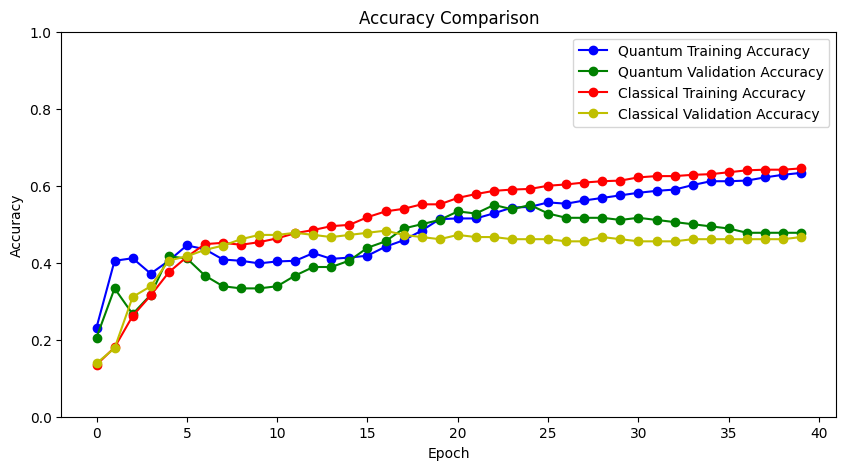

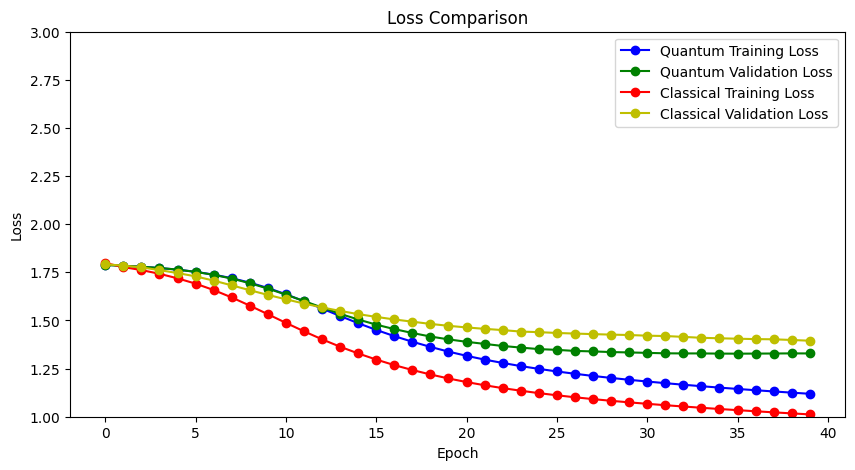

In [10]:
# Visualize the accuracies of the models.

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.plot(history_quantum.history['accuracy'], "-ob", label='Quantum Training Accuracy')
plt.plot(history_quantum.history['val_accuracy'], "-og", label='Quantum Validation Accuracy')
plt.plot(history_classical.history['accuracy'], "-or", label='Classical Training Accuracy')
plt.plot(history_classical.history['val_accuracy'], "-oy", label='Classical Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

# Plot loss comparison
plt.figure(figsize=(10, 5))
plt.plot(history_quantum.history['loss'], "-ob", label='Quantum Training Loss')
plt.plot(history_quantum.history['val_loss'], "-og", label='Quantum Validation Loss')
plt.plot(history_classical.history['loss'], "-or", label='Classical Training Loss')
plt.plot(history_classical.history['val_loss'], "-oy", label='Classical Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([1.0, 3.0])
plt.legend()
plt.show()

### **Binary Classification Model**

In [11]:
# Import libraries.

import numpy as np
import pennylane as qml
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import json
import os
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt

# Suppress TensorFlow warnings and logs
tf.get_logger().setLevel("ERROR")

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set the number of epochs, layers, and other parameters.
n_epochs = 40   # Number of optimization epochs
batch_size = 32 # number of batch size
n_layers = 5    # Number of random layers
n_qubits = 4    # number of qubits
n_train_per_class = 100  # Number of images per class for training
n_test_per_class = 30  # Number of images per class for testing
# Total images for training 600
# Total images for testing1 180

# Paths to the data
train_dir = '/content/Task5_QML/train1'
test_dir = '/content/Task5_QML/test1'
train_json = '/content/Task5_QML/train1/labels_data_train.json'
test_json =  '/content/Task5_QML/test1/labels_data_test.json'

# Relabeling the dataset: class 0 remains 0(Good weld), classes 1-5 become 1 (Defective) for binary classification.
def relabel_binary(labels_dict):
    return {k: (1 if v > 0 else 0) for k, v in labels_dict.items()}

# Load labels from JSON file and relabel for binary classification
with open(train_json) as f:
    train_labels_dict = json.load(f)
train_labels_dict_binary = relabel_binary(train_labels_dict)

with open(test_json) as f:
    test_labels_dict = json.load(f)
test_labels_dict_binary = relabel_binary(test_labels_dict)

# Define a function to load images and their corresponding labels.
def load_images_and_labels(directory, labels_dict, max_per_class):
    images = []
    labels = []
    class_counts = {i: 0 for i in range(2)}  # Updated for binary classification
    for img_name, label in labels_dict.items():
        if class_counts[label] < max_per_class:
            img_path = os.path.join(directory, img_name)
            if os.path.isfile(img_path):
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(2, 2))  # Downsampling the images size to 2x2
                img = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img)
                labels.append(label)
                class_counts[label] += 1
    return np.array(images), np.array(labels)

# Load and preprocess train data
train_images_binary, train_labels_binary = load_images_and_labels(train_dir, train_labels_dict_binary, n_train_per_class)
test_images_binary, test_labels_binary = load_images_and_labels(test_dir, test_labels_dict_binary, n_test_per_class)

# Ensure there are images loaded
if len(train_images_binary) == 0 or len(train_labels_binary) == 0 or len(test_images_binary) == 0 or len(test_labels_binary) == 0:
    raise ValueError("No images or labels were loaded. Please check the paths and label files.")

# Normalize the images
train_images_binary = train_images_binary / 255.0
test_images_binary = test_images_binary / 255.0

# Ensure the input shape is (batch_size, height, width, channels)
if train_images_binary.ndim == 3:
    train_images_binary = np.expand_dims(train_images_binary, axis=-1)
if test_images_binary.ndim == 3:
    test_images_binary = np.expand_dims(test_images_binary, axis=-1)

# Flatten images to fit the input size required by the AmplitudeEmbedding
train_images_flat_binary = train_images_binary.reshape((train_images_binary.shape[0], -1))
test_images_flat_binary = test_images_binary.reshape((test_images_binary.shape[0], -1))

# One-hot encode labels
lb = LabelBinarizer()
train_labels_binary = lb.fit_transform(train_labels_binary)
test_labels_binary = lb.transform(test_labels_binary)

# Prepare device and random parameters
dev = qml.device("default.qubit", wires=n_qubits)
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_qubits, 3)).astype(np.float32)
pooling_rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_qubits)).astype(np.float32)

# Define a Quantum Error Correction (QEC) with bit-flip.
def bit_flip_code_encode(wire, max_wire):
    if wire + 2 <= max_wire:
        qml.CNOT(wires=[wire, wire+1])
        qml.CNOT(wires=[wire, wire+2])

def bit_flip_code_decode(wire, max_wire):
    if wire + 2 <= max_wire:
        qml.CNOT(wires=[wire, wire+1])
        qml.CNOT(wires=[wire, wire+2])
        qml.Toffoli(wires=[wire+1, wire+2, wire])

# Define an avanced quantum convolution layer with a reasonable number of gate.
def advanced_quantum_conv_layer(weights, wires):
    max_wire = max(wires)
    for i, wire in enumerate(wires):
        bit_flip_code_encode(wire, max_wire)
        qml.RX(weights[i, 0], wires=wire)
        qml.RY(weights[i, 1], wires=wire)
        qml.RZ(weights[i, 2], wires=wire)
        bit_flip_code_decode(wire, max_wire)
    for i in range(len(wires) - 1):
        qml.CNOT(wires=[wires[i], wires[i + 1]])
    for i in range(len(wires) - 1):
        qml.CZ(wires=[wires[i], wires[i + 1]])
    for i in range(len(wires) - 1):
        qml.CY(wires=[wires[i], wires[i + 1]])

# Define an advanced quantum pooling layer with random parameters.
def advanced_quantum_pooling_layer(wires, params):
    for i in range(len(wires) // 2):
        qml.CNOT(wires=[wires[2 * i], wires[2 * i + 1]])
        qml.RY(params[i], wires=wires[2 * i + 1])
        qml.CNOT(wires=[wires[2 * i + 1], wires[2 * i]])
        qml.RY(-params[i], wires=wires[2 * i + 1])
    for i in range(len(wires) // 2):
        qml.CRZ(params[i], wires=[wires[2 * i], wires[2 * i + 1]])

# Define a multi-layer quantum convolutional neural network (QCNN)
@qml.qnode(dev, interface="jax")
def qcnn(inputs, weights, pooling_params):
    qml.AmplitudeEmbedding(inputs, wires=range(n_qubits), pad_with=0.0, normalize=True)
    for i in range(n_layers):
        advanced_quantum_conv_layer(weights[i], wires=range(n_qubits))
        advanced_quantum_pooling_layer(wires=range(n_qubits), params=pooling_params[i])
    return qml.probs(wires=range(n_qubits))

# Define the Quantum Binary Model.
class Quantum_Binary_Model(tf.keras.Model):
    def __init__(self, n_qubits, n_layers, n_classes):
        super(Quantum_Binary_Model, self).__init__()
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.q_weights = tf.Variable(
            initial_value=tf.random.normal(shape=(n_layers, n_qubits, 3), dtype=tf.float32),
            trainable=True, name='q_weights'
        )
        self.pooling_params = tf.Variable(
            initial_value=tf.random.normal(shape=(n_layers, n_qubits), dtype=tf.float32),
            trainable=True, name='pooling_params'
        )

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(n_classes, activation='sigmoid')

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        flat_inputs = tf.reshape(inputs, (batch_size, -1))

        # Usind a tf.py_function to wrap the QNode call
        q_outs = tf.py_function(
            func=lambda x: qcnn(x.numpy(), self.q_weights.numpy(), self.pooling_params.numpy()).astype(np.float32),
            inp=[flat_inputs],
            Tout=tf.float32
        )
        # Ensure the output shape is correct
        q_outs.set_shape([None, 2**self.n_qubits]) # Set the first dimension to None to allow variable batch sizes

        x = self.flatten(q_outs)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.output_layer(x)
        return x

# Define the cost function using JAX operations
def cost(params, inputs, labels):
    def single_cost(input, label):
        pred = qcnn(input, params['weights'], params['pooling_params'])
        # normalize for numerical stability
        pred = pred / jnp.sum(pred) # Normalize probabilities
        # Select the probabilities corresponding to measured qubits
        pred = pred[:len(label)]
        # Calculate cross-entropy loss using the correct formula
        return -jnp.dot(label, jnp.log(pred + 1e-10)) # Use dot product for cross-entropy

    total_loss = jax.vmap(single_cost)(inputs, labels)
    return jnp.mean(total_loss)

# Optimizer
opt = optax.adam(0.01)
init_params = {
    'weights': rand_params,
    'pooling_params': pooling_rand_params
}
state = opt.init(init_params)

# Training loop
@jax.jit
def update(params, x, y, opt_state):
    grads = jax.grad(cost)(params, x, y)
    updates, opt_state = opt.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state

# Define a function to run training in batches
def train_in_batches(init_params, state, images, labels, batch_size):
    n_samples = images.shape[0]
    for i in range(0, n_samples, batch_size):
        batch_images = jnp.array(images[i:i + batch_size])
        batch_labels = jnp.array(labels[i:i + batch_size])
        init_params, state = update(init_params, batch_images, batch_labels, state)
    return init_params, state

# Train the model in batches
for epoch in range(n_epochs):
    init_params, state = train_in_batches(init_params, state, train_images_flat_binary, train_labels_binary, batch_size)

# # Define classical model architecture for comparison with the quantum model
def Classical_Binary_Model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")  # Single output neuron for binary classification
    ])
    return model

# Initialize and compile models
n_classes_binary = 1  # Single output neuron for binary classification
quantum_binary_model = Quantum_Binary_Model(n_qubits, n_layers, n_classes_binary)
classical_binary_model = Classical_Binary_Model()

# Compile models
quantum_binary_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                             loss='binary_crossentropy', metrics=['accuracy'])
classical_binary_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                               loss='binary_crossentropy', metrics=['accuracy'])

# Train models
history_quantum_binary = quantum_binary_model.fit(train_images_binary, train_labels_binary,
                                                  epochs=n_epochs, batch_size=64,
                                                  validation_data=(test_images_binary, test_labels_binary),
                                                  verbose=2)
history_classical_binary = classical_binary_model.fit(train_images_binary, train_labels_binary,
                                                      epochs=n_epochs, batch_size=64,
                                                      validation_data=(test_images_binary, test_labels_binary),
                                                      verbose=2)

# Evaluate the models
test_loss_quantum_binary, test_acc_quantum_binary = quantum_binary_model.evaluate(test_images_binary, test_labels_binary, verbose=2)
test_loss_classical_binary, test_acc_classical_binary = classical_binary_model.evaluate(test_images_binary, test_labels_binary, verbose=2)

# Print the accuracies of the model
print(f'Quantum model (binary) test accuracy: {test_acc_quantum_binary:.4f}')
print(f'Classical model (binary) test accuracy: {test_acc_classical_binary:.4f}')



Epoch 1/40
4/4 - 6s - 2s/step - accuracy: 0.5100 - loss: 0.6894 - val_accuracy: 0.5000 - val_loss: 0.6883
Epoch 2/40
4/4 - 2s - 438ms/step - accuracy: 0.5750 - loss: 0.6846 - val_accuracy: 0.5667 - val_loss: 0.6855
Epoch 3/40
4/4 - 2s - 440ms/step - accuracy: 0.7900 - loss: 0.6809 - val_accuracy: 0.8500 - val_loss: 0.6831
Epoch 4/40
4/4 - 1s - 270ms/step - accuracy: 0.9050 - loss: 0.6775 - val_accuracy: 0.8833 - val_loss: 0.6807
Epoch 5/40
4/4 - 1s - 278ms/step - accuracy: 0.9050 - loss: 0.6737 - val_accuracy: 0.7500 - val_loss: 0.6780
Epoch 6/40
4/4 - 1s - 240ms/step - accuracy: 0.8550 - loss: 0.6693 - val_accuracy: 0.6333 - val_loss: 0.6752
Epoch 7/40
4/4 - 1s - 243ms/step - accuracy: 0.8100 - loss: 0.6645 - val_accuracy: 0.6000 - val_loss: 0.6718
Epoch 8/40
4/4 - 1s - 296ms/step - accuracy: 0.8000 - loss: 0.6591 - val_accuracy: 0.6000 - val_loss: 0.6679
Epoch 9/40
4/4 - 1s - 318ms/step - accuracy: 0.7900 - loss: 0.6532 - val_accuracy: 0.5667 - val_loss: 0.6639
Epoch 10/40
4/4 - 1s -

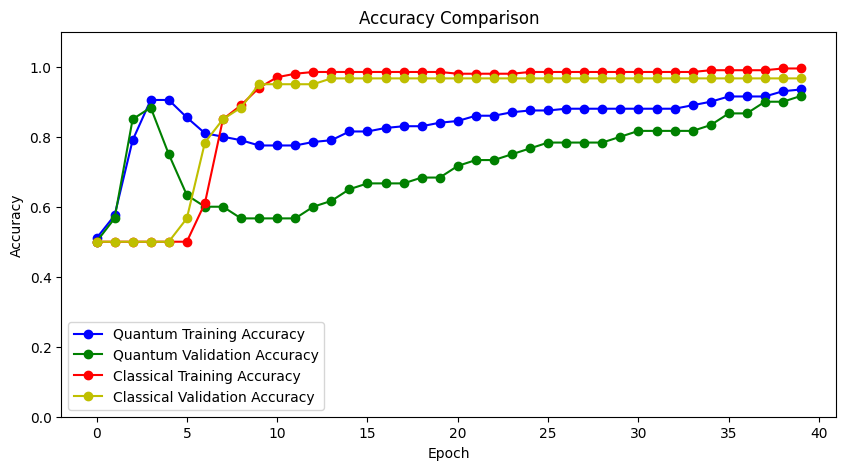

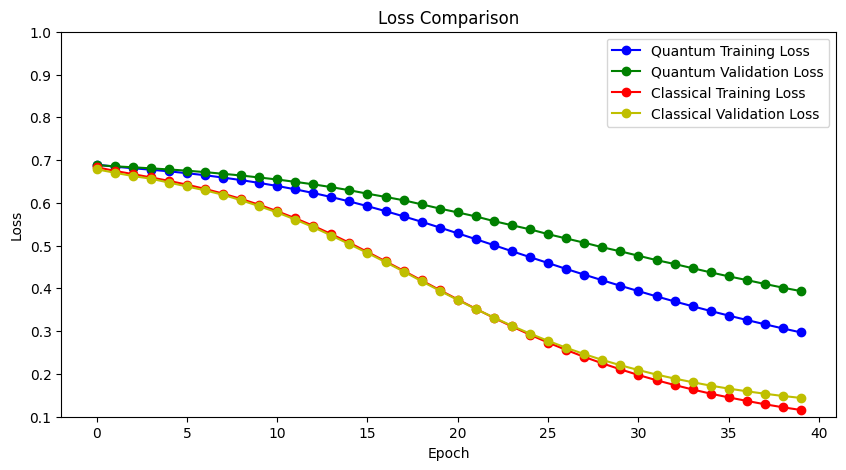

In [12]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.plot(history_quantum_binary.history['accuracy'], "-ob", label='Quantum Training Accuracy')
plt.plot(history_quantum_binary.history['val_accuracy'], "-og", label='Quantum Validation Accuracy')
plt.plot(history_classical_binary.history['accuracy'], "-or", label='Classical Training Accuracy')
plt.plot(history_classical_binary.history['val_accuracy'], "-oy", label='Classical Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.1])
plt.legend()
plt.show()

# Plot loss comparison
plt.figure(figsize=(10, 5))
plt.plot(history_quantum_binary.history['loss'], "-ob", label='Quantum Training Loss')
plt.plot(history_quantum_binary.history['val_loss'], "-og", label='Quantum Validation Loss')
plt.plot(history_classical_binary.history['loss'], "-or", label='Classical Training Loss')
plt.plot(history_classical_binary.history['val_loss'], "-oy", label='Classical Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.1, 1])
plt.legend()
plt.show()

### **Multi-classification model Vs Binary classification**

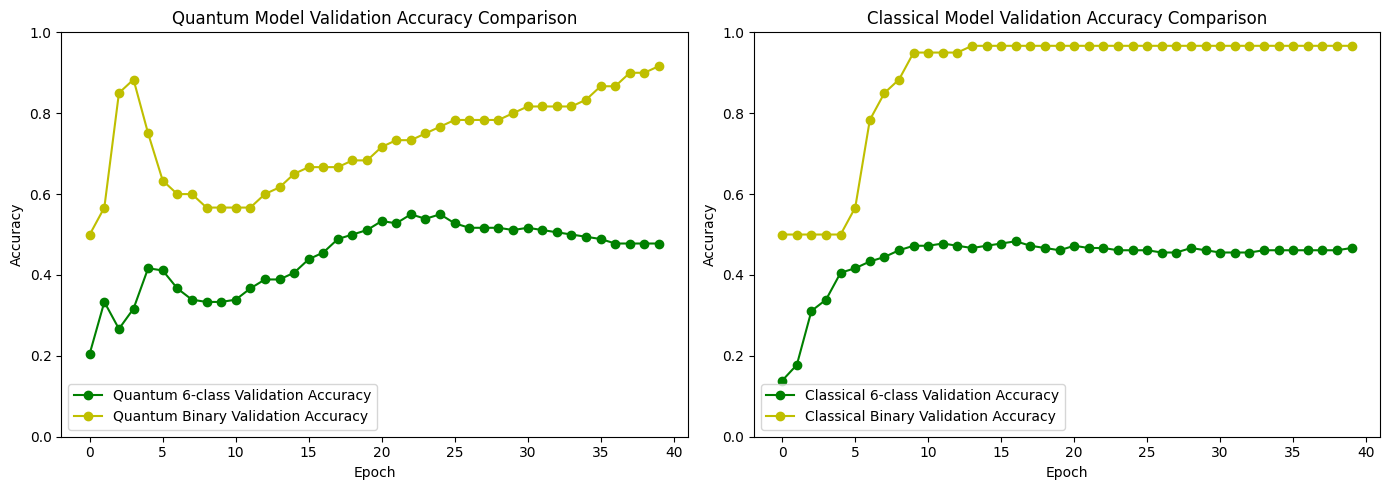

In [13]:
import matplotlib.pyplot as plt

# Plot Quantum 6-class vs Quantum 2-class validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_quantum.history['val_accuracy'], "-og", label='Quantum 6-class Validation Accuracy')
plt.plot(history_quantum_binary.history['val_accuracy'], "-oy", label='Quantum Binary Validation Accuracy')
plt.title('Quantum Model Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

# Plot Classical 6-class vs Classical 2-class validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_classical.history['val_accuracy'], "-og", label='Classical 6-class Validation Accuracy')
plt.plot(history_classical_binary.history['val_accuracy'], "-oy", label='Classical Binary Validation Accuracy')
plt.title('Classical Model Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

plt.tight_layout()
plt.show()



The graph results illustrate the performance of quantum and classical models for both 6-class and binary classification tasks.

- In the 6-class classification accuracy plot, both quantum and classical models exhibit similar trends, with the quantum model slightly outperforming the classical model. For binary classification, both models achieve high accuracy quickly, but the classical model reaches near-perfect accuracy faster and maintains it consistently. However, the quantum model demonstrates remarkable stability in the learning process, indicating its robustness and potential for handling complex architectures without stability issues.

- Comparing the quantum and classical models across both tasks, the quantum model stands out in the 6-class classification task, showcasing its potential for tackling more intricate classification problems. This suggests that the quantum model is particularly well-suited for datasets with complex features, emphasizing its capability to manage more challenging tasks. While further optimization is needed to enhance its accuracy, the quantum model's superior performance in the 6-class task highlights its promise for advanced applications in quantum machine learning.

### **Visualization of the classification**

In [14]:
def predict_labels(quantum_multiclass_model, quantum_binary_model, test_images, labels_dict):
    """
    Predict the labels for the given images using the 6-class and 2-class models.

    Args:
    quantum_multiclass_model: Trained quantum-classical model for 6-class classification.
    quantum_binary_model: Trained quantum-classical model for 2-class classification.
    test_images: Images to be classified.
    labels_dict: Dictionary mapping numerical labels to descriptive labels.

    Returns:
    Tuple of predicted labels for 6-class and 2-class classification.
    """

    # Predict using the quantum_multiclass_model
    predictions_6_class = quantum_multiclass_model.predict(test_images)
    predicted_labels_6_class = np.argmax(predictions_6_class, axis=1)

    # Convert predicted labels to integers
    predicted_labels_6_class = [int(label) for label in predicted_labels_6_class]

    # Print the 6-class prediction results
    print("6-class predictions:", predicted_labels_6_class)
    print("6-class predictions (descriptive):", [labels_dict[label] for label in predicted_labels_6_class])

    # Predict using the quantum_binary_model
    predictions_2_class = quantum_binary_model.predict(test_images)
    predicted_labels_2_class = (predictions_2_class > 0.5).astype(int).flatten()

    # Convert predicted labels to integers
    predicted_labels_2_class = [int(label) for label in predicted_labels_2_class]

    # Print the 2-class prediction results
    print("2-class predictions:", predicted_labels_2_class)
    print("2-class predictions (descriptive):", ["Defective" if label == 1 else "Good weld" for label in predicted_labels_2_class])

    return predicted_labels_6_class, predicted_labels_2_class

# Define the labels dictionary for 6-class classification
labels_dict = {
    0: "Good weld",
    1: "Burn through",
    2: "Contamination",
    3: "Lack of fusion",
    4: "Misalignment",
    5: "Lack of penetration"
}
# Predict the classification of the test_images.
predicted_labels_6_class, predicted_labels_2_class = predict_labels(quantum_multiclass_model, quantum_binary_model, test_images, labels_dict)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step
6-class predictions: [5, 1, 5, 4, 1, 1, 1, 4, 1, 1, 0, 5, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 4, 1, 1, 1, 3, 3, 3, 3, 3, 2, 5, 5, 3, 2, 5, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 5, 3, 3, 5, 5, 3, 2, 5, 2, 5, 5, 2, 5, 3, 2, 5, 5, 5, 5, 3, 2, 2, 2, 5, 3, 5, 5, 2, 3, 2, 2, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 5, 3, 5, 5, 4, 5, 4, 5, 4, 3, 5, 5, 3, 5, 5, 4, 2, 5, 5, 5, 4, 5, 5, 4, 3, 4, 3, 1, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2]
6-class predictions (descriptive): ['Lack of penetration', 'Burn through', 'Lack of penetration', 'Misalignment', 'Burn through', 'Burn through', 'Burn through', 'Misalignment', 'Burn through', 'Burn through', 'Good weld', 'Lack of penetration', 'Burn through', 'Burn through', 'Misalignment', 'Burn through', 'Burn through', 'Burn through', 'Burn through', 'Burn through', 'Burn through', 'Burn thr

### Confusion Matrix for Multi-Class Classification

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step


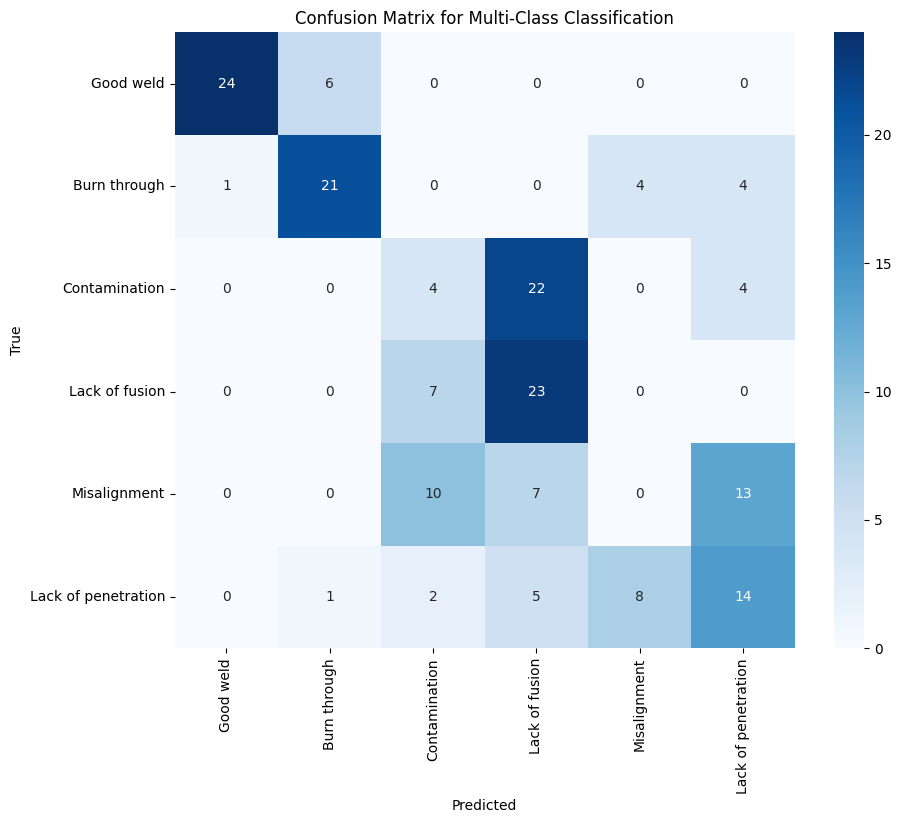

In [15]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions (y_pred_multi remains unchanged)
y_pred_multi = np.argmax(quantum_multiclass_model.predict(test_images), axis=1)

# Convert y_true_multi to single-digit labels
y_true_multi = np.argmax(test_labels, axis=1) # Convert one-hot encoded labels to single-digit labels

# Confusion Matrix for Multi-Class Classification
cm_multi = confusion_matrix(y_true_multi, y_pred_multi)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', xticklabels=list(labels_dict.values()), yticklabels=list(labels_dict.values()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Multi-Class Classification')
plt.show()

###**Confusion Matrix and ROC Curve for Binary Classification**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


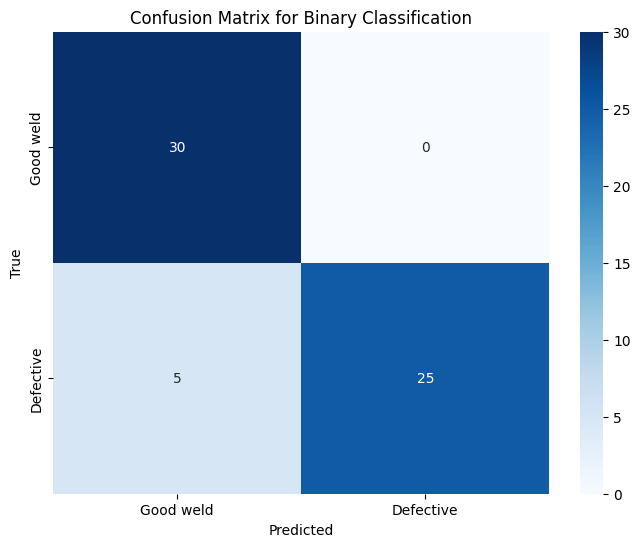

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step


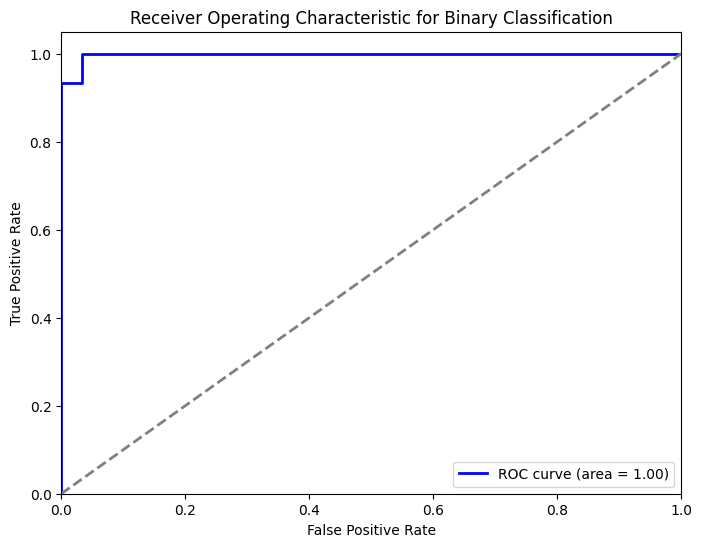

In [16]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred_binary = (quantum_binary_model.predict(test_images_binary) > 0.5).astype(int).flatten()
y_true_binary = np.array(test_labels_binary)

# Confusion Matrix for Binary Classification
cm_binary = confusion_matrix(y_true_binary, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues', xticklabels=["Good weld", "Defective"], yticklabels=["Good weld", "Defective"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Binary Classification')
plt.show()

# ROC Curve for Binary Classification
fpr, tpr, _ = roc_curve(y_true_binary, quantum_binary_model.predict(test_images_binary))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Binary Classification')
plt.legend(loc="lower right")
plt.show()


### **Interpretation of Confusion Matrix**

- The confusion matrix shows that the binary classification model correctly identified 30 true positives (defective samples) and 25 true negatives (good welds), indicating a strong performance. There were 5 false negatives (defective samples misclassified as good welds) and no false positives (good welds misclassified as defective). The ROC curve, which plots the True Positive Rate against the False Positive Rate, shows a curve that closely follows the top-left corner, which is ideal. The AUC value of 1.0 indicates perfect model performance, as an AUC of 1.0 represents an ideal classifier, while an AUC of 0.5 would indicate a model with no discriminative power. Overall, the model demonstrates exceptional accuracy and a strong ability to distinguish between good and defective welds, with minimal errors.

- In this context, we defined "defective" as the positive class because the primary goal of the model is to identify defects in welds, which are of particular concern in quality control. Identifying a defective weld correctly (true positive) is crucial because it ensures that potential issues are flagged and addressed, preventing faulty products from being used. On the other hand, correctly identifying a good weld (true negative) is also important, but the main focus remains on catching defects. This classification scheme helps prioritize the detection of defects, as missing a defective weld (false negative) could have more severe consequences than incorrectly flagging a good weld (false positive)




### **Function to Process new images and classify them. This function can be used in real_time process**

The function predict_labels_from_path is crucial for industrial applications as it automates the detection and classification of defects in production lines, enhancing quality control and efficiency. It works by first preprocessing an input image to make it suitable for analysis. The function then uses a binary quantum model to determine if the product is defective. If a defect is detected, a multiclass quantum model is employed to classify the specific type of defect, such as burn-through or contamination. This two-step approach ensures quick identification of good products and detailed analysis of defective ones, enabling real-time quality assurance and minimizing downtime in manufacturing processes.

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import custom_object_scope
from PIL import Image

# define a function to preprocess the new images.
def preprocess_image(image_path, target_size=(2, 2)):
    img = Image.open(image_path).convert('L')
    img = img.resize(target_size, Image.LANCZOS)
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

# Define the quantum circuit and convolution layer
def qcnn(inputs, weights, pooling_params):
    return np.random.rand(inputs.shape[0], 2**weights.shape[1])

# Define your custom Quantum_Multiclass_Model class
class Quantum_Multiclass_Model(tf.keras.Model):
    def __init__(self, n_qubits, n_layers, n_classes):
        super(Quantum_Multiclass_Model, self).__init__()
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.n_classes = n_classes
        self.q_weights = tf.Variable(
            initial_value=tf.random.normal(shape=(n_layers, n_qubits, 3), dtype=tf.float32),
            trainable=True, name='q_weights'
        )
        self.pooling_params = tf.Variable(
            initial_value=tf.random.normal(shape=(n_layers, n_qubits), dtype=tf.float32),
            trainable=True, name='pooling_params'
        )

        self.flatten = tf.keras.layers.Flatten()
        self.output_layer = tf.keras.layers.Dense(n_classes, activation='softmax')

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        flat_inputs = tf.reshape(inputs, (batch_size, -1))

        q_outs = tf.py_function(
            func=lambda x: qcnn(x.numpy(), self.q_weights.numpy(), self.pooling_params.numpy()).astype(np.float32),
            inp=[flat_inputs],
            Tout=tf.float32
        )
        q_outs.set_shape([None, 2**self.n_qubits])

        x = self.flatten(q_outs)
        x = self.output_layer(x)
        return x

    def get_config(self):
        return {"n_qubits": self.n_qubits, "n_layers": self.n_layers, "n_classes": self.n_classes}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Define your custom Quantum_Binary_Model class
class Quantum_Binary_Model(tf.keras.Model):
    def __init__(self, n_qubits, n_layers, **kwargs):
        super(Quantum_Binary_Model, self).__init__(**kwargs)
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.q_weights = tf.Variable(
            initial_value=tf.random.normal(shape=(n_layers, n_qubits, 3), dtype=tf.float32),
            trainable=True, name='q_weights'
        )
        self.pooling_params = tf.Variable(
            initial_value=tf.random.normal(shape=(n_layers, n_qubits), dtype=tf.float32),
            trainable=True, name='pooling_params'
        )

        self.flatten = tf.keras.layers.Flatten()
        self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        flat_inputs = tf.reshape(inputs, (batch_size, -1))

        q_outs = tf.py_function(
            func=lambda x: qcnn(x.numpy(), self.q_weights.numpy(), self.pooling_params.numpy()).astype(np.float32),
            inp=[flat_inputs],
            Tout=tf.float32
        )
        q_outs.set_shape([None, 2**self.n_qubits])

        x = self.flatten(q_outs)
        x = self.output_layer(x)
        return x

    def get_config(self):
        return {"n_qubits": self.n_qubits, "n_layers": self.n_layers}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Save the models for further prediction
quantum_multiclass_model = Quantum_Multiclass_Model(n_qubits=6, n_layers=5, n_classes=6)
quantum_binary_model = Quantum_Binary_Model(n_qubits=6, n_layers=5)

quantum_multiclass_model.save('Quantum_Multiclass_Model.keras')
quantum_binary_model.save('Quantum_Binary_Model.keras')

# Load the saved models using custom_object_scope
with custom_object_scope({'Quantum_Multiclass_Model': Quantum_Multiclass_Model, 'Quantum_Binary_Model': Quantum_Binary_Model}):
    quantum_multiclass_model = keras.models.load_model('Quantum_Multiclass_Model.keras')
    quantum_binary_model = keras.models.load_model('Quantum_Binary_Model.keras')

# Define a Function to classify the new images using the models.
def predict_labels_from_path(quantum_multiclass_model, quantum_binary_model, image_path, labels_dict):
    preprocessed_image = preprocess_image(image_path)

    predictions_2_class = (quantum_binary_model.predict(preprocessed_image) > 0.5).astype(int).flatten()
    predicted_labels_2_class = [int(label) for label in predictions_2_class]

    print("2-class predictions:", predicted_labels_2_class)
    print("2-class predictions (numeric):", ''.join(map(str, predicted_labels_2_class)))
    print("2-class predictions (descriptive):", ["Defective" if label == 1 else "Good weld" for label in predicted_labels_2_class])

    is_defective = predicted_labels_2_class[0] == 1

    if is_defective:
        predictions_6_class = quantum_multiclass_model.predict(preprocessed_image)
        predicted_labels_6_class = np.argmax(predictions_6_class, axis=1)
        predicted_labels_6_class = [int(label) for label in predicted_labels_6_class]

        print("6-class predictions:", predicted_labels_6_class)
        print("6-class predictions (numeric):", ''.join(map(str, predicted_labels_6_class)))
        print("6-class predictions (descriptive):", [labels_dict[label] for label in predicted_labels_6_class])
    else:
        predicted_labels_6_class = [0]

    return predicted_labels_6_class, predicted_labels_2_class

# Define the labels dictionary for 6-class classification
labels_dict = {
    0: "Good weld",
    1: "Burn through",
    2: "Contamination",
    3: "Lack of fusion",
    4: "Misalignment",
    5: "Lack of penetration"
}

# Example usage
image_path = "/content/Task5_QML/test1/170906-155007-Al 2mm-part2/frame_00791.png"
predicted_labels_6_class, predicted_labels_2_class = predict_labels_from_path(quantum_multiclass_model, quantum_binary_model, image_path, labels_dict)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_api.py:102: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2-class predictions: [0]
2-class predictions (numeric): 0
2-class predictions (descriptive): ['Good weld']


# **Conclusion**
### Optimization of the Industrial Welding Process

This function aids in optimizing the welding process by classifying defects and good welds in real-time. The following analyses can be performed based on the results:

#### Correlation Matrix
- **Identify Key Parameters**: Compute correlations between welding parameters (e.g., current, travel speed) and defect occurrences to find strongly associated parameters.

#### Time-Series Analysis
- **Trend Analysis**: Examine trends in defect occurrences over time to pinpoint periods with higher defect rates.
- **Seasonal Analysis**: Identify seasonal patterns in defect occurrences linked to changes in welding conditions or material properties.

#### Predictive Modeling
- **Logistic Regression**: Predict defect occurrence probabilities using welding parameters for proactive quality control.
- **Decision Trees and Random Forests**: Highlight key parameters leading to defects, providing insights for stricter control.

#### Application of Statistical Insights
- **Process Improvement**: Adjust welding parameters based on insights to reduce defects.
- **Quality Monitoring**: Implement real-time monitoring systems using predictive models to alert operators of high defect probabilities.

By utilizing a quantum neural network to identify defects and understand the parameters leading to them, these statistical approaches will provide a deeper insight into the welding process, enabling actionable steps to improve quality and efficiency.
.


## **Future Research Direction**

### Enhancing Quantum-Classical Model

1. **Increase Qubit Count**: Future research could explore the impact of increasing the number of qubits in the quantum convolutional layers. This may allow for more complex feature extraction, potentially improving model accuracy for both multi-class and binary classifications.

2. **Explore Quantum Noise Mitigation**: Investigate techniques to mitigate quantum noise, such as error correction codes and noise reduction algorithms. This could enhance the robustness and accuracy of quantum models, especially on real quantum hardware.

3. **Hybrid Architectures**: Develop more sophisticated hybrid quantum-classical architectures by combining quantum convolutional layers with advanced classical neural network layers. This could leverage the strengths of both paradigms to achieve superior performance.

### Data and Preprocessing Improvements

1. **Augment Data**: Utilize data augmentation techniques to artificially increase the size of the training dataset. This can help the model generalize better by learning from a more diverse set of examples.

2. **Higher Resolution Images**: Experiment with higher resolution images to see if they provide more detailed features that can be captured by the quantum layers, leading to improved classification performance.

3. **Imbalance Handling**: Implement techniques to handle class imbalance, such as oversampling minority classes or using class weighting in the loss function. This can ensure that the model pays sufficient attention to less frequent defect classes.

### Quantum Model Optimization

1. **Parameter Tuning**: Conduct extensive hyperparameter tuning for both the quantum and classical parts of the hybrid model. This includes optimizing the number of layers, learning rates, and other architectural choices.

2. **Quantum Circuit Optimization**: Research into more efficient quantum circuits for the convolutional layers, reducing the number of required gates and optimizing gate sequences to minimize error rates on quantum hardware.

3. **Quantum Hardware Integration**: Test and adapt the model for execution on actual quantum hardware. This can reveal practical challenges and performance differences compared to simulations, guiding further improvements.

### Application-Specific Improvements

1. **Real-Time Classification**: Develop a real-time classification system that integrates with industrial processes. This system can classify images on-the-fly, providing immediate feedback for quality control and defect detection.

2. **Defect Localization**: Extend the model to not only classify the type of defect but also localize it within the image. This can provide more detailed information for targeted interventions in the production process.

3. **Cross-Industry Applications**: Explore the applicability of the quantum-classical model in other industries where defect detection is critical, such as semiconductor manufacturing, automotive, and aerospace.

### Long-Term Outlook

1. **Advancements in Quantum Computing**: As quantum computing technology advances, with more qubits and lower error rates, quantum machine learning models are expected to outperform classical counterparts in certain tasks, potentially revolutionizing industries reliant on complex data analysis.

2. **Interdisciplinary Research**: Foster interdisciplinary research combining quantum computing, machine learning, and industrial engineering. This collaboration can lead to innovative solutions for long-standing challenges in defect detection and quality control.

By pursuing these research directions, the potential of quantum-classical hybrid models in industrial applications can be fully realized, leading to significant improvements in defect detection, quality control, and overall production efficiency.
